# KNN (K-nearest Neighbors)

In [1]:
# Import thư viện
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
data_raw = "./train_PTIT.csv"
df = pd.read_csv(data_raw)

In [3]:
df

,w_0,w_1,w_2,w_3,w_4,w_5,w_6,w_7,w_8,w_9,...,w_1424,w_1425,w_1426,w_1427,w_1428,w_1429,w_1430,w_1431,w_1432,subject
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Probabilistic_Methods
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Neural_Networks
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Genetic_Algorithms
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Rule_Learning
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
2433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Theory
2434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Probabilistic_Methods
2435,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Neural_Networks


In [4]:
name_2_Id = {
    "Probabilistic_Methods": 0,
    "Neural_Networks": 1,
    "Genetic_Algorithms": 2,
    "Rule_Learning": 3,
    "Reinforcement_Learning": 4,
    "Case_Based": 5,
    "Theory": 6,
}

id_2_Name = {
    "0": "Probabilistic_Methods",
    "1": "Neural_Networks",
    "2": "Genetic_Algorithms",
    "3": "Rule_Learning",
    "4": "Reinforcement_Learning",
    "5": "Case_Based",
    "6": "Theory",
}

In [5]:
# preprocessing subject
df["subject"] = df["subject"].map(name_2_Id)
df

,w_0,w_1,w_2,w_3,w_4,w_5,w_6,w_7,w_8,w_9,...,w_1424,w_1425,w_1426,w_1427,w_1428,w_1429,w_1430,w_1431,w_1432,subject
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
2434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2435,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


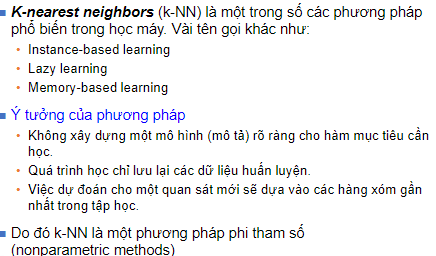

In [6]:
from IPython import display
display.Image("./Image/knn.png")

In [7]:
from sklearn import neighbors
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

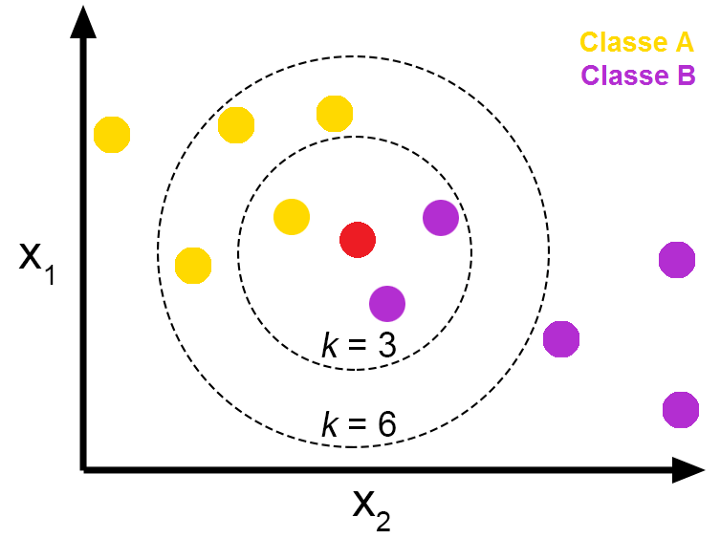

In [8]:
display.Image("./Image/knn5.png")

## Một vài tham số (Parameter)
n_neighbors: int, default=5

- Số lượng hàng xóm mặc định được sử dụng cho truy vấn.

weights: {‘uniform’, ‘distance’} or callable, default=’uniform’
- Hàm Weights sử dụng trong dự đoán. Các giá trị có thể là:

+ ‘uniform’ : Trọng số đều nhau. Tất cả các điểm trong mỗi vùng lân cận đều có trọng số như nhau

+ ‘distance’ : trọng số của các điểm bằng nghịch đảo khoảng cách của chúng. Những hàng xóm gần điểm truy vấn hơn sẽ có ảnh hưởng lớn hơn những hàng xóm ở xa hơn.

+ [callable] : một hàm do người dùng định nghĩa. Nó chấp nhận một mảng khoảng cách và trả về một mảng có cùng hình dạng chứa các trọng số.

metric: str or callable, default=’minkowski’

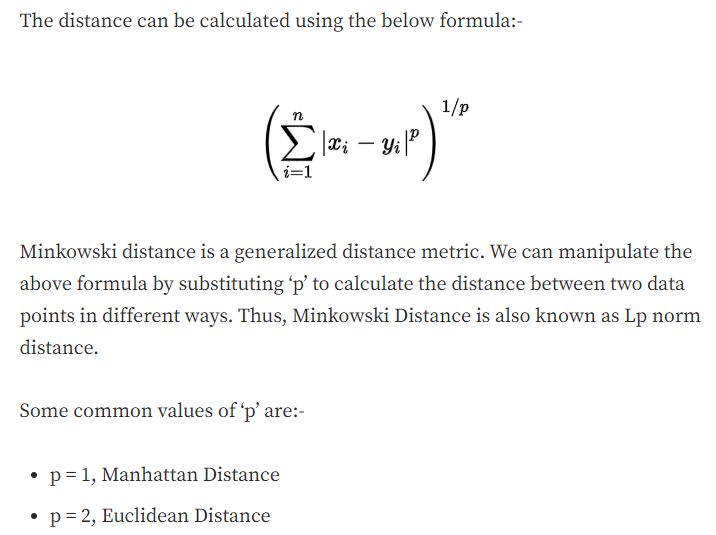

In [9]:
display.Image("./Image/knn2.png")

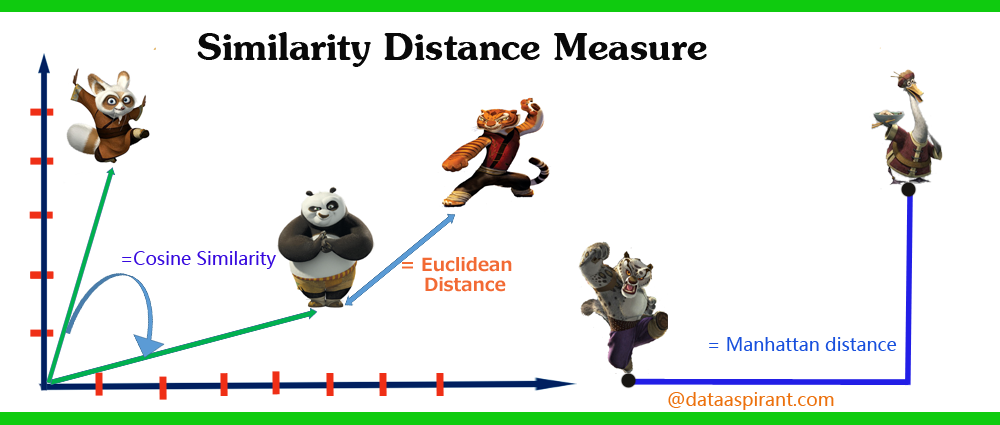

In [10]:
display.Image("./Image/knn3.png")

In [12]:
# Khai báo 3 vector
v1 = np.array([1, 2, 4])
v2 = np.array([1500, 2000, 1200])
v3 = np.array([1000, 2000, 3000])


# Khoảng cách Euclidean
def euclidean_distance(v1, v2):
    return np.sqrt(np.sum((v1 - v2) ** 2))

# Khoảng cách Consine
def cosine_distance(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

print("euclidean_distance v1, v2: ", euclidean_distance(v1, v2))
print("euclidean_distance v1, v3: ", euclidean_distance(v1, v3))
print("euclidean_distance v2, v3: ", euclidean_distance(v2, v3))

print()

print("cosine_distance v1, v2: ", cosine_distance(v1, v2))
print("cosine_distance v1, v3: ", cosine_distance(v1, v3))
print("cosine_distance v2, v3: ", cosine_distance(v2, v3))

euclidean_distance v1, v2:  2769.3719504609703
euclidean_distance v1, v3:  3737.113993444674
euclidean_distance v2, v3:  1868.1541692269404

cosine_distance v1, v2:  0.8105212535512913
cosine_distance v1, v3:  0.9914601339836674
cosine_distance v2, v3:  0.8770295059040306


In [13]:
# Chia tách bộ dữ liệu thành 2 phần test set và training
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:, :-1], df.iloc[:, -1], test_size = 0.2, random_state = 42
)

# test_size = 0.2 (Kích thước tập test, nghĩa là 20% cho test và 80% còn lại cho train)
# random_state =  42 (Thiết lập giá trị ngẫu nhiên để đảm bảo rằng kết quả chia tách sẽ giống nhau mỗi khi chạy code này)

In [14]:
len(X_train)

1949

In [15]:
X_test.shape

(488, 1433)

In [16]:
# Dùng khoảng cách Euclidean
clf = neighbors.KNeighborsClassifier(n_neighbors = 10, weights = 'distance', metric='euclidean')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("KNN accuracy: ", accuracy_score(y_test, y_pred))
print("KNN f1 score: ", f1_score(y_test, y_pred, average='weighted'))
print("KNN confusion matrix: ")
print(confusion_matrix(y_test, y_pred))

KNN accuracy:  0.45491803278688525
KNN f1 score:  0.4284930393455682
KNN confusion matrix: 
[[48  9  8  0  0  1  1]
 [43 81 26  2  1  2  3]
 [12  5 58  0  1  0  1]
 [12  7  6  2  1  5  1]
 [ 3 12  8  0  7  3  0]
 [20 12  7  1  1 16  0]
 [19 10 11  0  6  6 10]]


In [17]:
# Dùng khoảng cách Cosine
clf = neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'distance', metric='cosine')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("KNN accuracy: ", accuracy_score(y_test, y_pred))
print("KNN f1 score: ", f1_score(y_test, y_pred, average='weighted'))
print("KNN confusion matrix: ")
print(confusion_matrix(y_test, y_pred))

KNN accuracy:  0.7622950819672131
KNN f1 score:  0.7609161666582465
KNN confusion matrix: 
[[ 53   5   2   2   2   1   2]
 [ 12 130   3   1   1   3   8]
 [  2   2  68   0   2   0   3]
 [  1   4   1  20   0   2   6]
 [  1   4   2   2  20   3   1]
 [  3   4   2   5   0  43   0]
 [  3   9   3   4   2   3  38]]


### accuracy
Tỉ lệ giữa số điểm được dự đoán đúng và tổng số điểm trong tập dữ liệu kiểm thử

### confusion matrix

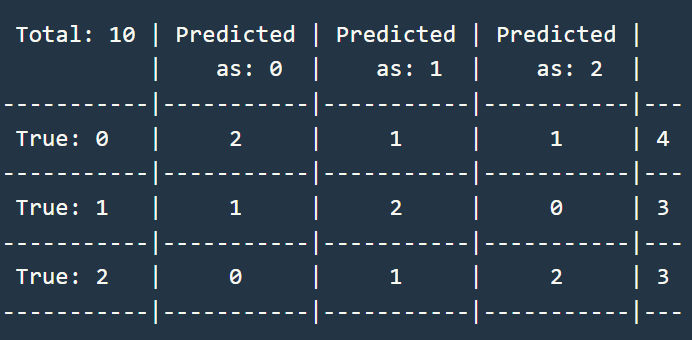

In [19]:
display.Image("./Image/confusion_matrix.png")

Có tổng cộng 10 điểm dữ liệu. Chúng ta xét ma trận tạo bởi các giá trị tại vùng 3x3 trung tâm của bảng.

Ma trận thu được được gọi là confusion matrix. Nó là một ma trận vuông với kích thước mỗi chiều bằng số lượng lớp dữ liệu. Giá trị tại hàng thứ i, cột thứ j là số lượng điểm lẽ ra thuộc vào class i nhưng lại được dự đoán là thuộc vào class j. Như vậy, nhìn vào hàng thứ nhất (0), ta có thể thấy được rằng trong số bốn điểm thực sự thuộc lớp 0, chỉ có hai điểm được phân loại đúng, hai điểm còn lại bị phân loại nhầm vào lớp 1 và lớp 2.